In [76]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Step 2: Assign Universe
financial_standing_ = ctrl.Antecedent(np.arange(0, 11, 1), 'financial_standing')
political_stance = ctrl.Antecedent(np.arange(0, 11, 1), 'political_stance')
career_experience = ctrl.Antecedent(np.arange(0, 11, 1), 'career_experience')
financial_standing_B = ctrl.Antecedent(np.arange(0, 11, 1), 'financial_standing_B')
political_stance_B = ctrl.Antecedent(np.arange(0, 11, 1), 'political_stance_B')
career_experience_B = ctrl.Antecedent(np.arange(0, 11, 1), 'career_experience_B')
compatibility = ctrl.Consequent(np.arange(0, 11, 1), 'compatibility')

# Step 2: Assign Membership Functions
financial_standing['poor'] = fuzz.trimf(financial_standing.universe, [0, 0, 3])
financial_standing['mid-class'] = fuzz.trimf(financial_standing.universe, [2, 5, 9])
financial_standing['rich'] = fuzz.trimf(financial_standing.universe, [8, 10, 10])

political_stance['left'] = fuzz.trimf(political_stance.universe, [0, 0, 5])
political_stance['centre'] = fuzz.trimf(political_stance.universe, [2, 5, 8])
political_stance['right'] = fuzz.trimf(political_stance.universe, [5, 10, 10])

career_experience['novice'] = fuzz.trimf(career_experience.universe, [0, 0, 4])
career_experience['intermediate'] = fuzz.trimf(career_experience.universe, [3, 5, 8])
career_experience['expert'] = fuzz.trimf(career_experience.universe, [6, 10, 10])

financial_standing_B['poor'] = fuzz.trimf(financial_standing.universe, [0, 0, 3])
financial_standing_B['mid-class'] = fuzz.trimf(financial_standing.universe, [2, 5, 9])
financial_standing_B['rich'] = fuzz.trimf(financial_standing.universe, [8, 10, 10])

political_stance_B['left'] = fuzz.trimf(political_stance.universe, [0, 0, 5])
political_stance_B['centre'] = fuzz.trimf(political_stance.universe, [2, 5, 8])
political_stance_B['right'] = fuzz.trimf(political_stance.universe, [5, 10, 10])

career_experience_B['novice'] = fuzz.trimf(career_experience.universe, [0, 0, 4])
career_experience_B['intermediate'] = fuzz.trimf(career_experience.universe, [3, 5, 8])
career_experience_B['expert'] = fuzz.trimf(career_experience.universe, [6, 10, 10])


compatibility['low'] = fuzz.trimf(compatibility.universe, [0, 0, 5])
compatibility['medium'] = fuzz.trimf(compatibility.universe, [0, 5, 10])
compatibility['high'] = fuzz.trimf(compatibility.universe, [5, 10, 10])

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show t

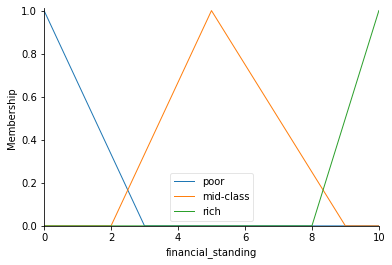

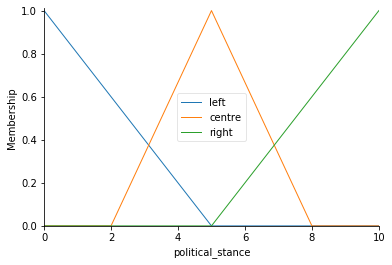

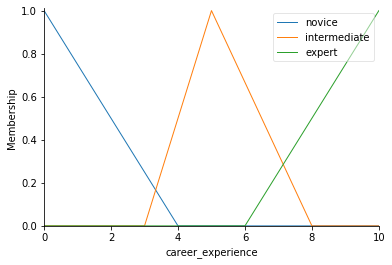

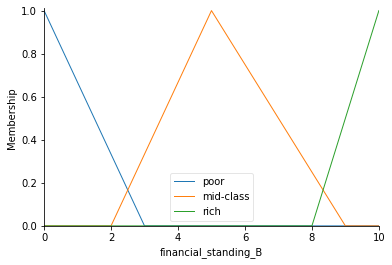

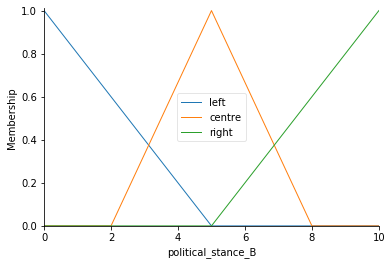

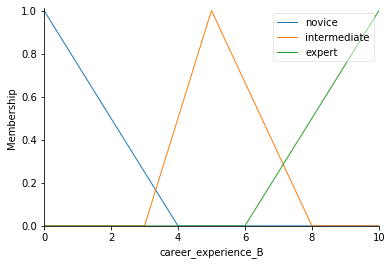

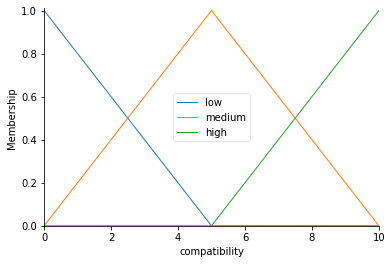

In [77]:
financial_standing.view()
political_stance.view()
career_experience.view()
financial_standing_B.view()
political_stance_B.view()
career_experience_B.view()

compatibility.view()

In [78]:
# Step 3: Fuzzy Rules for Compatibility based on Financial Standing
rule1_fs = ctrl.Rule(financial_standing['poor'] | financial_standing_B['rich'], compatibility['low'])
rule2_fs = ctrl.Rule(financial_standing['rich'] | financial_standing_B['poor'], compatibility['low'])

rule3_fs = ctrl.Rule(financial_standing['mid-class'] & (financial_standing_B['poor'] | financial_standing_B['rich']), compatibility['medium'])
rule4_fs = ctrl.Rule(financial_standing_B['mid-class'] & (financial_standing['poor'] | financial_standing['rich']), compatibility['medium'])

rule5_fs = ctrl.Rule(financial_standing['poor'] & financial_standing_B['poor'], compatibility['high'])
rule6_fs = ctrl.Rule(financial_standing['mid-class'] & financial_standing_B['mid-class'], compatibility['high'])
rule7_fs = ctrl.Rule(financial_standing['rich'] & financial_standing_B['rich'], compatibility['high'])

financial_standing_ctrl = ctrl.ControlSystem([rule1_fs, rule2_fs, rule3_fs, rule4_fs, rule5_fs, rule6_fs, rule7_fs])
financial_standing_compatibility = ctrl.ControlSystemSimulation(financial_standing_ctrl)

In [79]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
financial_standing_compatibility.input['financial_standing'] = 6.5
financial_standing_compatibility.input['financial_standing_B'] = 5

# Crunch the numbers
financial_standing_compatibility.compute()

8.162878787878789


/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


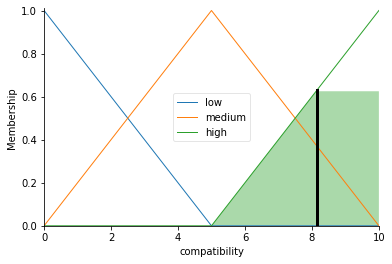

In [80]:
print(financial_standing_compatibility.output['compatibility'])
print(financial_standing_compatibility.input['medium'])
print(financial_standing_compatibility.output['compatibility'])
compatibility.view(sim=financial_standing_compatibility)